# Liverpool Assignment
- Installing Packages
- Preparing and Exploring the Dataset
- Unsupervised Learning
- Supervised Learning

## Installing packages

In [55]:
#tells matplotlib to use the inline backend which renders the graphs in the notebook

%matplotlib inline 

#imports the packages needed and renames some for convenience 

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed
from numpy import sqrt 

#import prince
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Importing and exploring the dataset

For this assignment I used the "Student Performance Data Set" from the UCI Machine Learning archive (https://archive.ics.uci.edu/ml/datasets/student+performance#).

This is two datasets on educational performance at two schools in Portugal.

The first dataset is on performance in maths (n = 395), the second is on performance in Portugese (n = 649). 

Whilst students in the first dataset *seem* to be present in the second dataset, the data appears to be have been gathered at different times in the year and for a small number of students certain attributes have changed which makes a join of the datasets of questionable validity.

I will therefore focus on the larger portugese acheivement dataset, I will however investigate whether the predictors of sucess are similar for maths and portugese. In particular I will look at whether being sucessful maths predicts sucess in portugese. 


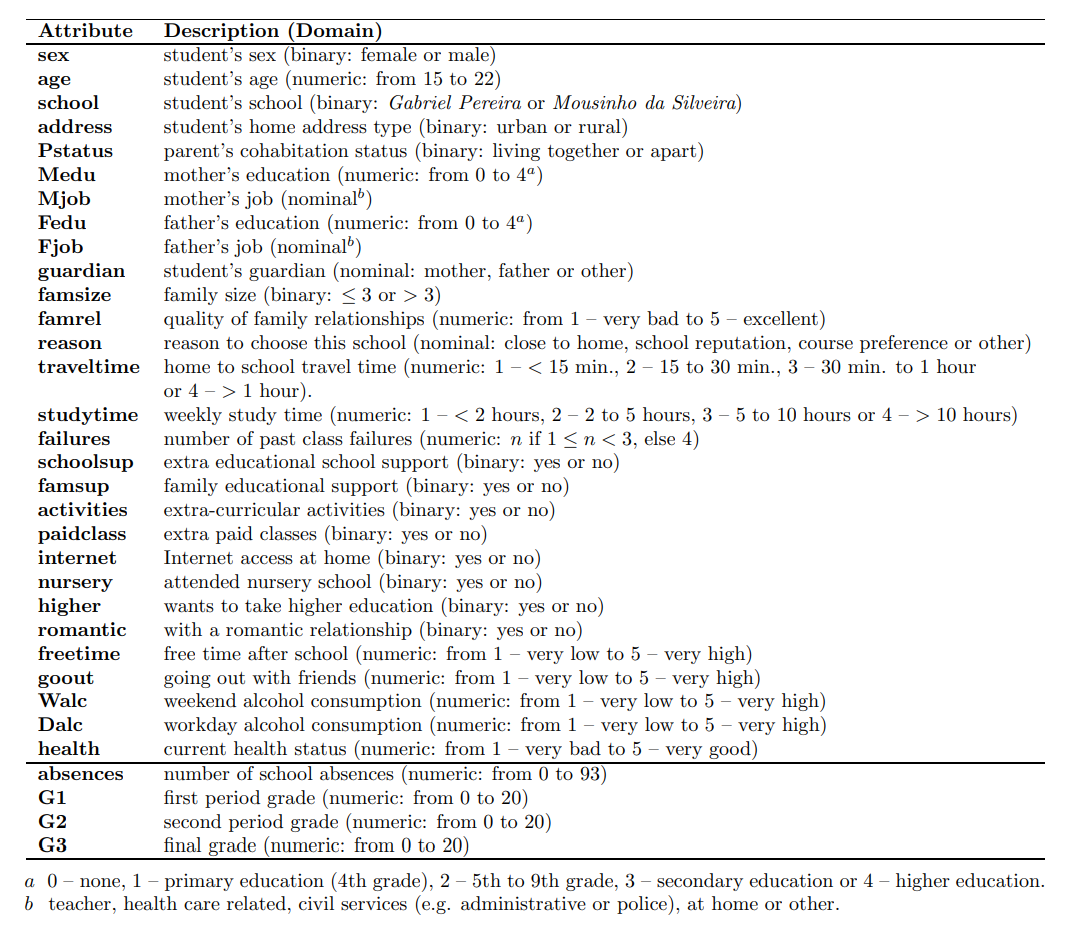

In [4]:
Image("../Liverpool/Attribute_table.png") #displays a png explaining the variables in the dataset

In [5]:
#uses read_csv from pandas to import read in the csv file
db_port = pd.read_csv("../Liverpool/Data/student-por.csv", sep = ";", header = 0)

#uses pandas' describe function to provide descriptive statistics on our variables, categorical variables are included by setting the 'include' to 'all'. 
db_port.describe(include = 'all').T

count unique     top freq     mean       std  min  25%  50%  75%  \
school       649      2      GP  423      NaN       NaN  NaN  NaN  NaN  NaN   
sex          649      2       F  383      NaN       NaN  NaN  NaN  NaN  NaN   
age          649    NaN     NaN  NaN  16.7442   1.21814   15   16   17   18   
address      649      2       U  452      NaN       NaN  NaN  NaN  NaN  NaN   
famsize      649      2     GT3  457      NaN       NaN  NaN  NaN  NaN  NaN   
Pstatus      649      2       T  569      NaN       NaN  NaN  NaN  NaN  NaN   
Medu         649    NaN     NaN  NaN  2.51464   1.13455    0    2    2    4   
Fedu         649    NaN     NaN  NaN  2.30663   1.09993    0    1    2    3   
Mjob         649      5   other  258      NaN       NaN  NaN  NaN  NaN  NaN   
Fjob         649      5   other  367      NaN       NaN  NaN  NaN  NaN  NaN   
reason       649      4  course  285      NaN       NaN  NaN  NaN  NaN  NaN   
guardian     649      3  mother  455      NaN       NaN  NaN  NaN  NaN  NaN   
traveltime   649    NaN     NaN  NaN  1.56857   0.74866    1    1    1    2   
studytime    649    NaN     NaN  NaN  1.93066   0.82951    1    1    2    2   
failures     649    NaN     NaN  NaN  0.22188  0.593235    0    0    0    0   
schoolsup    649      2      no  581      NaN       NaN  NaN  NaN  NaN  NaN   
famsup       649      2     yes  398      NaN       NaN  NaN  NaN  NaN  NaN   
paid         649      2      no  610      NaN       NaN  NaN  NaN  NaN  NaN   
activities   649      2      no  334      NaN       NaN  NaN  NaN  NaN  NaN   
nursery      649      2     yes  521      NaN       NaN  NaN  NaN  NaN  NaN   
higher       649      2     yes  580      NaN       NaN  NaN  NaN  NaN  NaN   
internet     649      2     yes  498      NaN       NaN  NaN  NaN  NaN  NaN   
romantic     649      2      no  410      NaN       NaN  NaN  NaN  NaN  NaN   
famrel       649    NaN     NaN  NaN  3.93066  0.955717    1    4    4    5   
freetime     649    NaN     NaN  NaN  3.18028   1.05109    1    3    3    4   
goout        649    NaN     NaN  NaN   3.1849   1.17577    1    2    3    4   
Dalc         649    NaN     NaN  NaN  1.50231  0.924834    1    1    1    2   
Walc         649    NaN     NaN  NaN  2.28043   1.28438    1    1    2    3   
health       649    NaN     NaN  NaN  3.53621   1.44626    1    2    4    5   
absences     649    NaN     NaN  NaN  3.65948   4.64076    0    0    2    6   
G1           649    NaN     NaN  NaN  11.3991   2.74527    0   10   11   13   
G2           649    NaN     NaN  NaN  11.5701   2.91364    0   10   11   13   
G3           649    NaN     NaN  NaN   11.906   3.23066    0   10   12   14   

            max  
school      NaN  
sex         NaN  
age          22  
address     NaN  
famsize     NaN  
Pstatus     NaN  
Medu          4  
Fedu          4  
Mjob        NaN  
Fjob        NaN  
reason      NaN  
guardian    NaN  
traveltime    4  
studytime     4  
failures      3  
schoolsup   NaN  
famsup      NaN  
paid        NaN  
activities  NaN  
nursery     NaN  
higher      NaN  
internet    NaN  
romantic    NaN  
famrel        5  
freetime      5  
goout         5  
Dalc          5  
Walc          5  
health        5  
absences     32  
G1           19  
G2           19  
G3           19

- Exploring the dataset

Visually inspecting the table above, some outliers stand out. 
For example whilst the average age is ~16.7, however the maximum age is 22

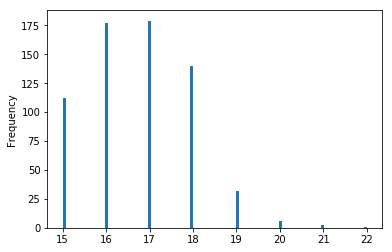

In [6]:
db_port["age"].plot.hist(bins=100) #plots a histogram with 100 bins of the frequncency of the values of the variable age from the data frame db_port

We can see that most students are between 15 and 19, however the number of students who are 20 and older in unclear from this plot, so we can instead use value_counts from pandas to return a table  

In [7]:
db_port["age"].value_counts(ascending = True) #provides a table of the values for age from the db_port data frame, in ascending order

22      1
21      2
20      6
19     32
15    112
18    140
16    177
17    179
Name: age, dtype: int64

It appears that there are very few students in these older age groups. There could be a number of reasons we could speculate about why these outliers are in the dataset. We can use queries to see if variables in the dataset can explain 

In [8]:
db_port.query("age > 19")[["age", "G3", "failures", "absences", "health"]] #queries the db_port dataframe for information on five specific variables for students aged 20 and older

age  G3  failures  absences  health
279   22   5         3        12       1
299   20  12         0         8       2
351   20  15         2         0       5
407   21  12         2         0       5
413   21  10         2        21       4
414   20  15         0         8       3
421   20  10         1         5       5
506   20  10         1         8       3
574   20  10         1        12       4

In [9]:
#queries the dataframe for individuals of age 20 and 21
#specifies that it is the G3 and absences variables that should be extracted
#calculates the mean
db_port.query("22 > age > 19")\
        [["G3", "absences"]]\
        .mean() 

G3          11.75
absences     7.75
dtype: float64

We can see from the results of these queries that the only 22 year old has very bad health, a high number of absences, and poor grades.
The other older students have grades (mean = 11.75) within a stadard deviation of the dataset average of 11.9 .
However the mean number of absences (7.75) is more than twice the dataset average of 3.6 .

We can also explore other relationships within the data by creating new variables, for example G3 is the students final grades and G1 is the students first period grade, a new variable calculated as G1 - G3 could provide insight into how much a student has improved over the year, which we can then compare to variables such as whether the student had received extra paid classes.

In [10]:
db_port2 = db_port.assign(Grade_progress = lambda x: db_port['G3']
                                                -db_port['G1'])
db_port2['Grade_progress'].describe()

count    649.000000
mean       0.506934
std        1.820756
min      -11.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       11.000000
Name: Grade_progress, dtype: float64

We can see that on average the difference between a students grade at the start of the year and the end of the year is only about 0.5 marks on a 20 point scale. Further more the standard deviation is 1.82 . This suggests that early grades are a very strong predictor of later grades.

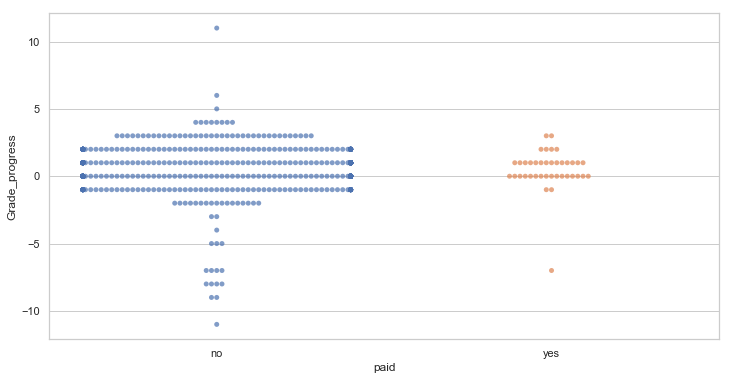

In [11]:
sns.set(rc={'figure.figsize':(12,6)}) #sets the size of figures created using seaborn

sns.set_style("whitegrid")           #this sets the aesthetic of seaborne plots to whitegrid, which provides a handy line for y = 0
sns.swarmplot(x = "paid",            #calls the swarmplot function from the seaborne package, defines the x axis as the paid variable
              y = "Grade_progress",  #defines the y axis as grade progress
               data = db_port2,      #tells the package what data to use
              alpha=0.7              #sets the transparency of the points plotted
             );

We can see from this plot that most students improve their scores over the year, and that students who received extra paid classes are less likely to see their grades drop throughout the year.

- Conclusion

In this section I have installed the required packages, read in our dataset and performed some initial exploration of the data.
In the next section I will look at how clustering algorythms can help us further out understanding of the dataset.

## Unsupervised learning

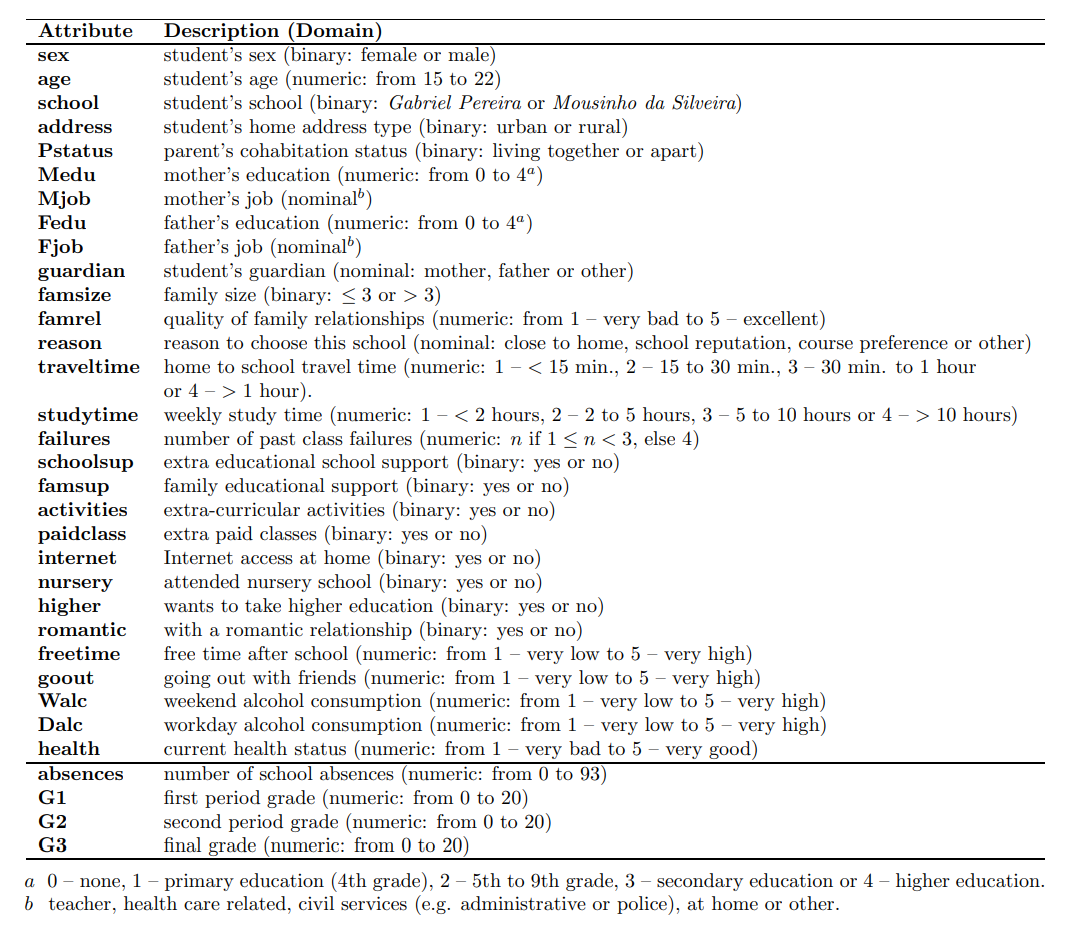

In [14]:
Image("../Liverpool/Attribute_table.png")

We can see from looking at the above that many of the variables could potentially outline groupings. 

For example some variables seem to relate directly to the students home and family situation ('address','famsize','Pstatus', 'famrel', 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'traveltime'). It could be fruitfull to apply a clustering algorythm to these variables to test if there are meaningfull groupings of home situations and explore whether these impact outcomes such as grades and absesnces. However of these variables only 4 are numeric ('Medu', 'Fedu' 'famrel','traveltime').

Given that most of our data is not numeric, we can take two approaches here:
 - Fitting k-means models on all the numerical variables.
 - Using Factor Analysis with Mixed Data (Pagès, 2002) to include all these variables in our dataset.
 

In [15]:
#Creating scaled arrays for all the numerical variables
Num_variables = ['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

db_portnum = scale(db_port.filter(Num_variables))

db_portstd = pd.DataFrame(db_portnum, 
                 index = db_port.index,
                 columns = Num_variables
                )


/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


- Fitting a KMeans clustering with 5 clusters on our *unscaled* data.

In [16]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator = KMeans(n_clusters = 5) #creating an KMeans estimator with 5 clusters

estimator.fit(db_port.filter(Num_variables)) #computes kmean clustering for the numerical variables

k5_raw = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above


- Fitting a KMeans clustering with 5 clusters on our *scaled* data.

In [17]:

estimator.fit(db_portstd) #computes kmean clustering for the scales values of the numerical variables

k5_std = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above

- We can also fit a principle componant analysis model, this allows us to project our data into 2 dimensions allowing us new ways of fitting our kmeans clustering algorythm and giving us the ability to visualise our other clusterings.

In [18]:
pca_estimator = PCA(n_components=2)

components = pca_estimator.fit_transform(db_port.filter(Num_variables))

components = pd.DataFrame(components,
                              index = db_port.index,
                              columns = ["C-1", "C-2"]
                             )

estimator.fit(components)

k5_pca = pd.Series(estimator.labels_,
                       index=components.index
                      )

- We can compare these models visually to see if they are similar.

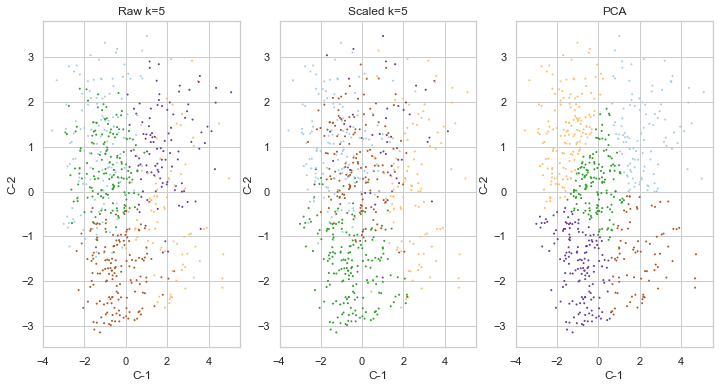

In [19]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]

components.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw k=5")         

ax = axs[1]

components.assign(labels=k5_std)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Scaled k=5")    
             
ax = axs[2]

components.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")   
             
plt.show()

Worrying, these aren't very similar. The Pca seems to have the more distinct groups, and the scaled data seems to fare better than the raw data.

We can instead try to use to factor analysis using mixed data model to include **all** our variables. This method applies a multiple corespondence analysis style approach to cathegorical variables, and 

- Fitting a Fator Analysis with Mixed Data using Max Halford's "Prince" package (https://github.com/MaxHalford/prince)

In [20]:
db_port_pred = db_port.filter(['address','famsize','Pstatus', 'famrel', 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'traveltime']) #first we create a new dataframe without the dependant variables (grades and absenses)

seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

famd_estimator = prince.FAMD(    
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=None,
    engine='auto',
)

famd_estimator = famd_estimator.fit(db_port_pred) 

componentsmfa = pd.DataFrame(famd_estimator.transform(db_port_pred), index = db_port_pred.index)

componentsmfa.columns = ["C-1", "C-2"] #this renames the columns, when I try to do this as part of the previous line my computer crashes, I do not understand this.

estimator.fit(componentsmfa)

k5_famd = pd.Series(estimator.labels_,
                       index=components.index
                      )


NameError: name 'prince' is not defined

NameError: name 'componentsmfa' is not defined

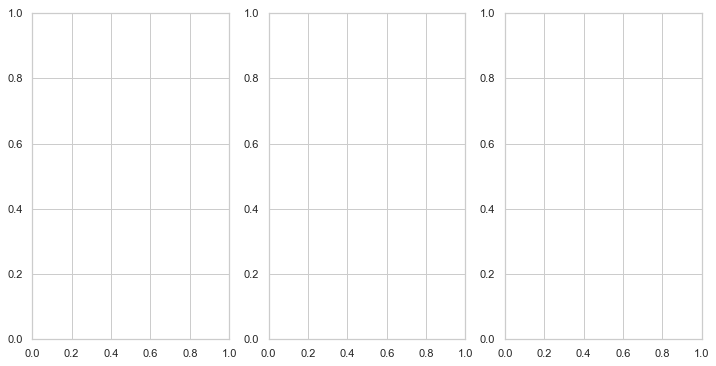

In [21]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]
componentsmfa.assign(labels=k5_famd)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("famd")

ax = axs[1]
components.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw")

ax = axs[2]
components.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")

plt.show()

- Evaluating our clustering models using the Calinski and Harabasz score

The first non-visual way in which we can evaluate our models is using the Calinski and Harabasz score or Variance Ratio Criterion. This metric calculates the ratio of dispersion within clusters and between clusters. Unfortunately we cannot use Calinski and Harabasz for the FAMD results as this metric relies on caluclating geometric distances between points which is not meaningfull for a mix of categorical and numerical data. 

In [22]:
chs_raw = calinski_harabasz_score(db_port.filter(Num_variables), k5_raw)

chs_std = calinski_harabasz_score(db_port.filter(Num_variables), k5_std)

chs_pca = calinski_harabasz_score(db_port.filter(Num_variables), k5_pca)


NameError: name 'calinski_harabasz_score' is not defined

In [23]:
pd.Series({"Raw": chs_raw,
               "Standardised": chs_std,
               "PCA": chs_pca,
              })

NameError: name 'chs_raw' is not defined

The KMeans clustering on the unscaled variables is the best score according to this metric.

We can try to optimise the number of clusters in this fit by calculating the Calinski and Harabasz score for a number of values of k. We then plot the reulsts against the number of clusters in what is known as an elbow plot.

In [24]:
seed(12345)

chss = {}    #create an empty dict
for i in [2, 5, 10, 15, 20, 30]:
    estimator = KMeans(n_clusters=i)
    estimator.fit(db_port.filter(Num_variables))
    chs = calinski_harabasz_score(db_port.filter(Num_variables),
                                  estimator.labels_
                                 )
    chss[i] = chs
chss = pd.Series(chss)

chss.plot.line()

NameError: name 'calinski_harabasz_score' is not defined

It appears that running out model with k = 10 will provide us with the best clustering.

In [25]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator10 = KMeans(n_clusters = 10) #creating an KMeans estimator with 10 clusters

estimator10.fit(db_port.filter(Num_variables)) #computes kmean clustering for the numerical variables

k10_raw = pd.Series(estimator10.labels_, index=db_port.index)

Another way we can asses the quality of our clustering is using silhouette scores.

- Evaluating our clustering models using Silhouette Scores

In [26]:
sil_raw10 = silhouette_score(db_port.filter(Num_variables), k10_raw,
                           metric="euclidean"
                          )
sil_raw5 = silhouette_score(db_port.filter(Num_variables), k5_raw,
                           metric="euclidean"
                          )
sil_std = silhouette_score(db_port.filter(Num_variables), k5_std,
                           metric="euclidean"
                          )
sil_pca = silhouette_score(db_port.filter(Num_variables), k5_pca,
                           metric="euclidean"
                          )

pd.Series({"Raw k=5": sil_raw5,
           "Raw k=10": sil_raw10,
               "Standardised": sil_std,
               "PCA": sil_pca,
              })

Raw k=5         0.132135
Raw k=10        0.108027
Standardised    0.101563
PCA             0.092402
dtype: float64

Silhouette scores are bound between 1 and -1 with scores close to zero indicating that there is a high level of overlap between our clusters. 
We can see that of the 5 cluster models the k means on the raw data fares the best (though not by much). Interestingly the ten-cluster k means on the raw data is slightly worse than the five-cluster k means, contrary to what our elbow plot would have suggested.

As with above, we can run our model with a number of clusters and see which has the best silhouette score.


In [27]:
seed(12345)

sils = {}    #create an empty dict
for i in [2, 5, 10, 15, 20, 30, 40]:
    estimator = KMeans(n_clusters=i)
    estimator.fit(db_port.filter(Num_variables))
    sil = silhouette_score(db_port.filter(Num_variables),
                                  estimator.labels_,
                           metric="euclidean"
                                 )
    sils[i] = sil
sils = pd.Series(sils)

sils

2     0.161916
5     0.128616
10    0.111825
15    0.103613
20    0.096294
30    0.095273
40    0.097526
dtype: float64

Here the highest score is for k=2, k=5 does however have the second highest score.

- Exploring our clusterings internally.

In [28]:
g = db_port.filter(Num_variables).groupby(k5_std) #creates an object g with the values of the variables in our clustering grouped according to the results of the clustering

g.mean() #creates a table with the mean value of each variable for each cluster

Medu      Fedu    famrel  traveltime  studytime  failures  freetime  \
0  1.721854  1.562914  3.456954    1.867550   1.880795  0.172185  2.377483   
1  3.654450  3.408377  4.057592    1.324607   2.109948  0.031414  3.020942   
2  2.638095  2.476190  3.771429    1.723810   1.657143  0.142857  3.609524   
3  1.659574  1.595745  4.000000    1.914894   1.468085  1.914894  3.765957   
4  2.058065  1.774194  4.322581    1.367742   2.083871  0.045161  3.690323   

      goout      Dalc      Walc    health  
0  2.278146  1.225166  1.814570  3.291391  
1  2.905759  1.167539  1.853403  3.664921  
2  4.123810  2.942857  4.180952  3.942857  
3  3.638298  1.744681  2.744681  3.808511  
4  3.638710  1.135484  1.832258  3.258065

In [29]:
g.size() #outouts the number of students in each cluster

0    151
1    191
2    105
3     47
4    155
dtype: int64

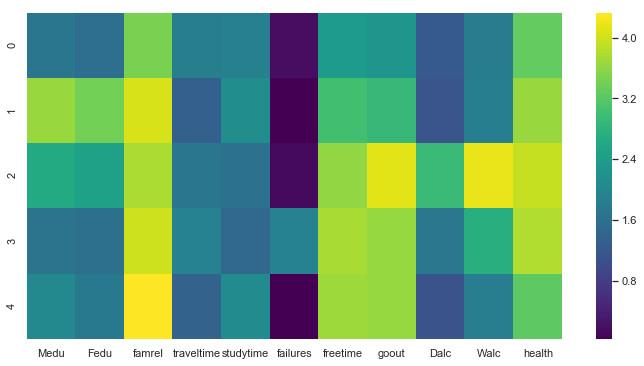

In [30]:
sns.heatmap(g.mean(), cmap='viridis') #creates a heatmap using seaborn with the average values for each variable in each of our clusters

As expected from the results of the silhouette scores there is much overlap between our clusters. 

Cluster 0 is notable for having particularily high average amounts of past failures as well as the lowest levels of average parental education, and studytime. Students from this cluster go out with friends more and have the most freetime on average,and have the second higest level of both weekend and weektime alcohol comsumption.

Cluster 2 have massively higher levels of alcohol consumption compared to other groups, interestingly they also have the highest average health.

In contrast cluster 4 have the highest levels of parental education and studytime and low levels of alcohol consumption.

It is a shame there is not a geographical measurment that could help explain some of these clusterings. Travel time could be somewhat related to rurality, but could be confounded by issues such as teh availability of public transport or of a parent to drive the child to school.

- Characterising our clusterings externally.

In [31]:
db_port.groupby(k5_std)["absences", "G3"].mean() #outputs a table with the mean values of absences and final grades for students in each cluster

absences         G3
0  3.523179  11.397351
1  3.125654  13.570681
2  5.104762  10.742857
3  4.765957   8.574468
4  3.135484  12.148387

As expected from looking at our clustering internally, group 0 has the worst outcome in terms of average final grade, and group 4 has the highest.

Group 2 had the highest levels of alcohol consumption and went out with friends more often. Unsurprisingly, they had the higest average level of absences. The cluster with the second higest level of weekday alcohol consumption (cluster 0) also had the second highest average level of absences.

Cluster 3 seems the hardest to interpret, it also has low average parental education but has comparatively good grades compared to group one, however cluster 3 students don#t go out with friends as much on average and have lower average freetime. However this does not translate into more studytime.

- Exploring the famd clustering

In [32]:
h = db_port_pred.groupby(k5_famd)
h.mean()

NameError: name 'k5_famd' is not defined

In [33]:
sns.heatmap(h.mean(), cmap='viridis')

NameError: name 'h' is not defined

xxxx

- Conclusion

In this section I have have tried a number of unsupervised approaches to some education data. My intial concern was that the mainly categorical nature of the data would impede meaningull clusterings, I therefore searched the litterature for methods of meaningfully clusting using mixed data.

However this inital concern was misguided as the clusters provided by the few numerical variables were both interpretable and appeared to predict key outcomes in logical ways. Conversly the approach which included cagorical variables was uninterpretable and did not make logical predictions.

## Supervised Learning

- Introduction 

In this section I will try to make predictions about end of year grades.

I will begin by fitting a linear regression and a descision tree. 

I will then apply k folds cross validation to both models and perform parameter optimisation on the random forest model.

Finally I will compare the predictive performance of the above models.



- The first consideration is which variables to include in our models.

We know from out clustering that parental education seems to have some effect on whether a cluster has high grades. We also know that alcohol consumption has an effect, particularily weekday alcohol consumption.

From our initial data exploration we know that age is also a factor, at least for tail values of age. We also know from this section that having paid extra classes has an effect.

Whilst we have not explored it so far the litterature on education highlights the importance of gender as a predictor of grades.XXXX

There are two schools in our data bases, we can include these as dummy variables. Another option, not within the scope of this assignment would be to create a hierchical model with the students at level one and the school at level two. This would be especially usefull if we had data on characteristics of each school.

It would seem logical that past failures and a high number of absences would indicate a struggling student 

We know from when we created our grade progress variable that the grades a student achevives early in the year is strongly related to the grades they go on to get at the end of the year.

In [34]:
f = "G3 ~ age + Fedu + Medu + studytime + Walc + Dalc + failures + absences + paid + sex + school + G1 + G2"
#f = "G3 ~ G1 + G2"
lm_raw = sm.ols(f, db_port)\
       .fit()
lm_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     283.3
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          4.39e-254
Time:                        19:05:53   Log-Likelihood:                -1059.5
No. Observations:                 649   AIC:                             2147.
Df Residuals:                     635   BIC:                             2210.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0794      0.787     -0.101      0.920      -1.625       1.467
paid[T.yes]     -0.1808      0.211     -0.859      0.391      -0.594       0.233
sex[T.M]        -0.1380      0.110     -1.252      0.211      -0.354       0.078
school[T.MS]    -0.2029      0.114     -1.777      0.076      -0.427       0.021
age              0.0306      0.044      0.696      0.487      -0.056       0.117
Fedu             0.0250      0.059      0.421      0.674      -0.092       0.142
Medu            -0.0427      0.059     -0.725      0.469      -0.158       0.073
studytime        0.0596      0.064      0.933      0.351      -0.066       0.185
Walc            -0.0203      0.050     -0.402      0.688      -0.119       0.079
Dalc            -0.0688      0.069     -0.993      0.321      -0.205       0.067
failures        -0.2282      0.095     -2.393      0.017      -0.416      -0.041
absences         0.0199      0.011      1.755      0.080      -0.002       0.042
G1               0.1311      0.037      3.548      0.000       0.059       0.204
G2               0.8797      0.034     25.584      0.000       0.812       0.947
==============================================================================
Omnibus:                      453.786   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9861.743
Skew:                          -2.806   Prob(JB):                         0.00
Kurtosis:                      21.254   Cond. No.                         390.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected the biggest contributor to our estimates of a students final grades is the previous grades a student had received
In fact, running a ols regression with only the previous grades gives us an R squared value of 0.848, as opposed to 0.853 with the above model!

Most of our variables are not statistically significant here, only G1, G2, and failures.
We can try to run our model with only these variables.

In [35]:
f = "G3 ~ failures + G1 + G2"
lm_raw2 = sm.ols(f, db_port)\
       .fit()
lm_raw2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1209.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          2.96e-264
Time:                        19:12:07   Log-Likelihood:                -1068.0
No. Observations:                 649   AIC:                             2144.
Df Residuals:                     645   BIC:                             2162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0851      0.241      0.353      0.724      -0.388       0.559
failures      -0.2109      0.091     -2.321      0.021      -0.389      -0.032
G1             0.1398      0.036      3.872      0.000       0.069       0.211
G2             0.8880      0.034     26.093      0.000       0.821       0.955
==============================================================================
Omnibus:                      472.306   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10854.592
Skew:                          -2.957   Prob(JB):                         0.00
Kurtosis:                      22.142   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All our independant variables are now significant at the p < 0.05 level. Our R squared is now marginally smaller, but our model is less likely to be overfitting the data.

We can then use our models to make predictions about our students results:

In [36]:
yp_raw = lm_raw.fittedvalues
yp_raw2 = lm_raw2.fittedvalues
#yp_raw.head()
#yp_raw2.head()

A popular extension to linear regression models is random forests. To fit this model we need to create a dataframe with all out independant variables.

- First we create some dummy variables for the non numerical variables

In [37]:
#creates a new dataframe with dummy variables for each sex,setting drop first as true means we drop the\
#first level of each variable, in this case female is the default 
sex_dum = pd.get_dummies(db_port['sex'], drop_first = True)

#as above but for the paid classes variable, default is no paid extraclasses
paid_dum = pd.get_dummies(db_port['paid'], drop_first = True)

#as above but for the school variable, default is the school called Gabiel Periera 
school_dum = pd.get_dummies(db_port['school'], drop_first = True)

- We can then create a dataframe of our independant variables

In [38]:
X = pd.concat([db_port[["age", "Fedu", "Medu", "studytime", "Walc", "Dalc", "failures", "absences", "G1", "G2"]], paid_dum, sex_dum, school_dum], axis=1)
X.rename(columns = {'yes':'paid_class'}, inplace = True) #renames the column for wheter a student received paid classed from yes to paid_class
#X.head()

In [39]:
rf_raw = RandomForestRegressor(n_estimators=100,
                               max_features=None
                              )
rf_raw.fit(X, db_port["G3"])

rf_raw_lbls = rf_raw.predict(X)

We can also fit a random forest with the three significant variables from the ols above.

In [40]:
X2 = db_port[["failures", "G1", "G2"]]

rf_raw.fit(X2, db_port["G3"])

rf_raw_lbls2 = rf_raw.predict(X2)

We can summarise our variables in a single table.

In [41]:
results = pd.DataFrame({"LM Many X's": yp_raw,
                        "LM significant X's": yp_raw2,
                        "RF Many X's": rf_raw_lbls,
                        "Rf significant X's": rf_raw_lbls2, 
                        "Truth": db_port["G3"]
                       })
results.head()

LM Many X's  LM significant X's  RF Many X's  Rf significant X's  Truth
0    10.187893            9.853440        11.04           10.734671     11
1    11.350116           11.111239        11.14           10.943587     11
2    13.411863           13.306561        12.23           13.247310     12
3    14.500383           14.474100        14.21           14.765261     14
4    13.245847           13.166806        12.95           13.354344     13

- Model evaluation, cross validation, and parameter optimisation

One way of evaluating the predictive performance of our model is by looking at the r squared value, which is a measure of how much of the total varience in the dependant variable is explained by the dependant variables in our model.


In [42]:
y_true = db_port["G3"]
r_squared_values= pd.DataFrame({"LM Many X's": [r2_score(y_true, yp_raw)],
                                "LM significant X's":[r2_score(y_true, yp_raw2)],
                                "RF Many X's": [r2_score(y_true, rf_raw_lbls)],
                                "Rf significant X's": [r2_score(y_true, rf_raw_lbls2)]})
r_squared_values

LM Many X's  LM significant X's  RF Many X's  Rf significant X's
0     0.852921            0.849022     0.976932            0.906067

As we can see our R squares are very high! This is promising, but our model could be overfitting.

Another way of measuring predictive performance is by calculating the mean squared error of our predictions.

In [65]:
MSE_values= pd.DataFrame({"LM Many X's": [metrics.mean_squared_error(y_true, yp_raw)],
                                "LM significant X's":[metrics.mean_squared_error(y_true, yp_raw2)],
                                "RF Many X's": [metrics.mean_squared_error(y_true, rf_raw_lbls)],
                                "Rf significant X's": [metrics.mean_squared_error(y_true, rf_raw_lbls2)]})
MSE_values



LM Many X's  LM significant X's  RF Many X's  Rf significant X's
0     1.532714            1.573346     0.240393            0.978884

The values we are trying to predict are student grades between 0 and 20, in light of this these seem to be quite good mse values, however the Random forest with many variables is suspiciously low.

Another potential issue is that these are *mean* errors. It could be the case that our model performs *extremely* well on some of our students, and this is hiding very poor performance on some of the others.

We can investigate whether this is the case visually.

/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


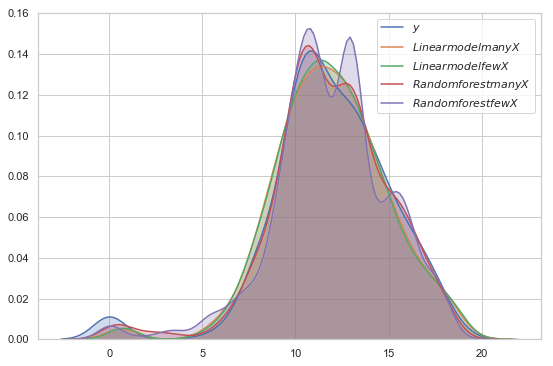

In [44]:
f, ax = plt.subplots(1, figsize=(9, 6))
sns.kdeplot(y_true, shade=True, ax=ax, label='$y$')
sns.kdeplot(yp_raw, shade=True, ax=ax, label='$Linear model many X$')
sns.kdeplot(yp_raw2, shade=True, ax=ax, label='$Linear model few X$')
sns.kdeplot(rf_raw_lbls, shade=True, ax=ax, label='$Random forest many X$')
sns.kdeplot(rf_raw_lbls2, shade=True, ax=ax, label='$Random forest few X$')
plt.show()

We can see from inspecting this graph that while there is some discrepency between ourmodels and the true values of y, they do seem to fit the broadly bimodal shape of the true data (in blue).

There are two main parameters for random forests, the number of estimators and the maximum number of features. 

However there is another reason to be skeptical of our model: we may still be overfitting the data. If this is the case our models will not perform very well on a new batch of data. This is especially bad for data sets like educational datasets where the observations in the data change entirely every year.

We can try to migitigate this by cross validating our models. To do so we leave out part of our data as a 'test data' and then train our model on the remaining data. We then compare how well our model can make predictions on the nwe data is has not 'seen' yet.

To ensure our cross validation is not misleading due to the 'test data' being atypical, we can use an iterative aproach. A simple approach is k folds cross validation, which seperates the data into k different groups of samples.

In [63]:
lm_kcv_mses = cross_val_score(LinearRegression(),
                              X,
                              db_port["G3"],
                              cv=5,
                              scoring="neg_mean_squared_error"
                             )

lm_kcv_mses = sqrt(-lm_kcv_mses).mean()

lm2_kcv_mses = cross_val_score(LinearRegression(),
                              X2,
                              db_port["G3"],
                              cv=5,
                              scoring="neg_mean_squared_error"
                             )

lm2_kcv_mses =  sqrt(-lm2_kcv_mses).mean()

rf_kcv_mses = cross_val_score(rf_raw,
                              X2,
                              db_port["G3"],
                              cv=5,
                              scoring="neg_mean_squared_error"
                             )

rf_kcv_mses = sqrt(-rf_kcv_mses).mean()

rf2_kcv_mses = cross_val_score(rf_raw,
                              X2,
                              db_port["G3"],
                              cv=5,
                              scoring="neg_mean_squared_error"
                             )

rf2_kcv_mses = sqrt(-rf2_kcv_mses).mean()


MSE_crossvalidated_values= pd.DataFrame({"LM Many X's": [lm_kcv_mses],
                                "LM significant X's":[lm2_kcv_mses],
                                "RF Many X's": [rf_kcv_mses],
                                "Rf significant X's": [rf2_kcv_mses]})
MSE_crossvalidated_values

LM Many X's  LM significant X's  RF Many X's  Rf significant X's
0     1.280527            1.240448     1.417569            1.410448

Compared with the non-crossvalidated models:

In [66]:
MSE_values

LM Many X's  LM significant X's  RF Many X's  Rf significant X's
0     1.532714            1.573346     0.240393            0.978884